Wrapper Methods.
<br>
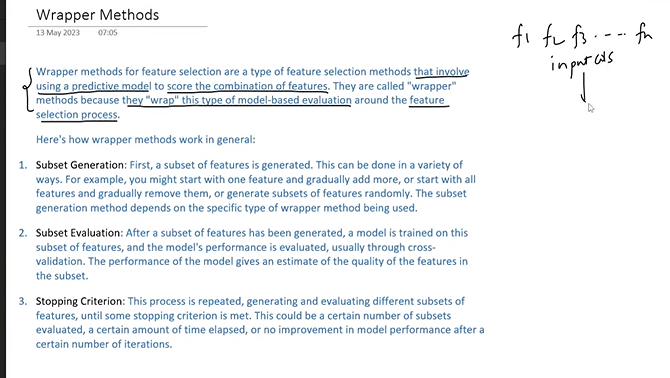

Techniques-->
1. Exhaustive Selection
2. Forward Selection
3. Backward Elimination
4. Recursive Feature Elimination

<br>

Exhaustive Selection/Best subset selection.
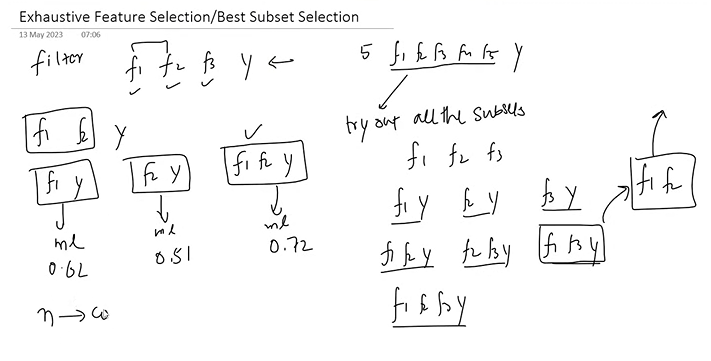

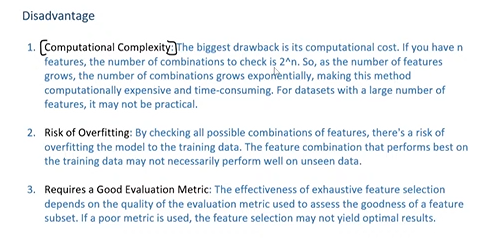



In [5]:
from sklearn import datasets

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import cross_val_score

In [2]:
! pip install --upgrade scikit-learn mlxtend

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -----------------------------

  You can safely remove it manually.


In [6]:
iris = datasets.load_iris()

In [10]:
# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines


In [12]:
df = iris_df

In [13]:
df.sample(5)

,sepal_len,sepal_wid,petal_len,petal_wid,class
79,5.7,2.6,3.5,1.0,1
147,6.5,3.0,5.2,2.0,2
140,6.7,3.1,5.6,2.4,2
25,5.0,3.0,1.6,0.2,0
134,6.1,2.6,5.6,1.4,2


In [15]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = LogisticRegression()
sel = EFS(lr,max_features=4,scoring='accuracy',cv=5)

In [16]:
model = sel.fit(df.iloc[:,:4],df['class'])

c:\Users\ankit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  **_get_additional_lbfgs_options_dict("iprint", iprint),
Features: 15/15

In [17]:
model.best_score_

np.float64(0.9733333333333334)

In [18]:
model.best_feature_names_

('sepal_len', 'sepal_wid', 'petal_len', 'petal_wid')

In [19]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': np.float64(0.7533333333333333),
  'feature_names': ('sepal_len',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.56666667, 0.63333333]),
  'avg_score': np.float64(0.5666666666666667),
  'feature_names': ('sepal_wid',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal_len',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('petal_wid',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667]),
  'avg_score': np.float64(0.8133333333333332),
  'feature_names': ('sepal_len', 'sepal_wid')},
 5: {'feature_idx': (0, 2),
  'cv_s

In [20]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T

In [27]:
metric_df['feature_names']=str(metric_df['feature_names'])

In [28]:
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,0 (sepal_l...,0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,0 (sepal_l...,0.046932,0.036515,0.018257
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,0 (sepal_l...,0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,0 (sepal_l...,0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,0 (sepal_l...,0.069612,0.05416,0.02708
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,0 (sepal_l...,0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,0 (sepal_l...,0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,0 (sepal_l...,0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,0 (sepal_l...,0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,0 (sepal_l...,0.032061,0.024944,0.012472


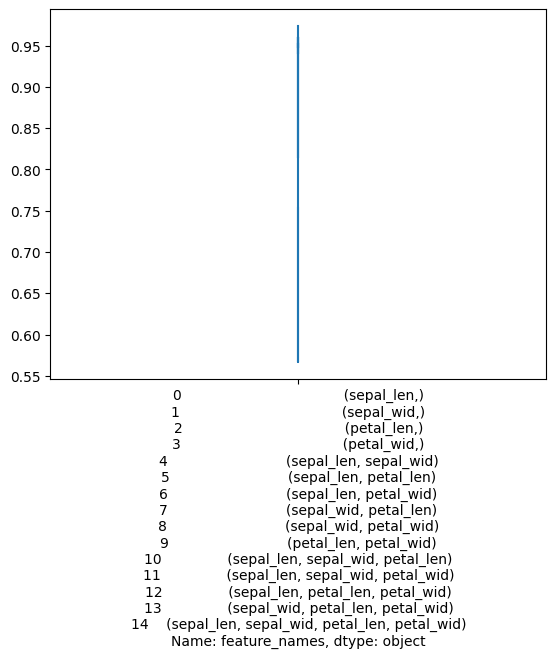

In [29]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,8))
plt.plot(metric_df['feature_names'],metric_df['avg_score'])
plt.show()

In [30]:
# eg of regression
link = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(link)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df['medv'],test_size=0.2,random_state=2)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [33]:
# baseline model 
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()

print('training',np.mean(cross_val_score(model,X_train,y_train,cv=5,scoring='r2')))
print('testing',np.mean(cross_val_score(model,X_test,y_test,cv=5,scoring='r2')))

training 0.7050401205374819
testing 0.6881584642617274


In [34]:
lr = LinearRegression()
exh = EFS(lr,max_features=12,scoring='r2',cv=10,print_progress=True,n_jobs=-1)
sel = exh.fit(X_train,y_train)

Features: 8190/8190

In [35]:
sel.best_score_

np.float64(0.6908017709038575)

In [36]:
sel.best_feature_names_

('0', '1', '3', '4', '5', '7', '8', '9', '10', '11', '12')

In [37]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.21114948846401937, 0.05617257789397889, 0.1...",0.090584,"(0,)",0.058456,0.078706,0.026235
1,"(1,)","[0.10024498418931094, 0.057415019085727104, -0...",0.08041,"(1,)",0.059363,0.079927,0.026642
2,"(2,)","[0.18401775043295243, 0.10274194717127505, 0.1...",0.18668,"(2,)",0.084623,0.113938,0.037979
3,"(3,)","[0.07730135125361781, 0.035964826531153404, -0...",0.027614,"(3,)",0.049668,0.066874,0.022291
4,"(4,)","[0.24448453708830642, 0.10867049515410976, 0.0...",0.139739,"(4,)",0.096446,0.129856,0.043285
...,...,...,...,...,...,...,...
8185,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)","[0.5987193157165683, 0.7871143213974939, 0.633...",0.681317,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)",0.077374,0.104178,0.034726
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6061158850048469, 0.794619755098147, 0.6566...",0.681429,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.078376,0.105526,0.035175
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6101154304612249, 0.8103792767941539, 0.653...",0.688792,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.078139,0.105207,0.035069
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6010802291159094, 0.799884179411922, 0.6481...",0.688205,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.075591,0.101777,0.033926


In [ ]:
#calculate adjusted r2 score for each feature


## Sequential Backward Selection/Elimination
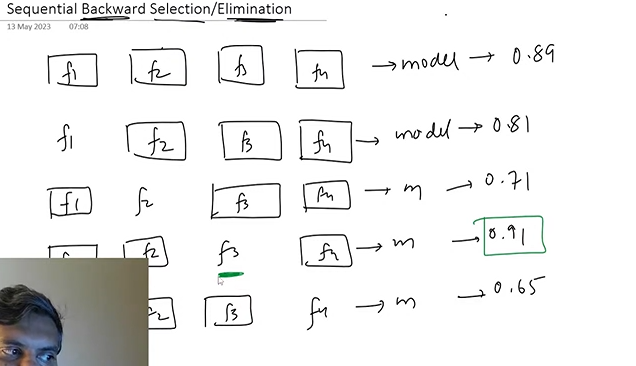

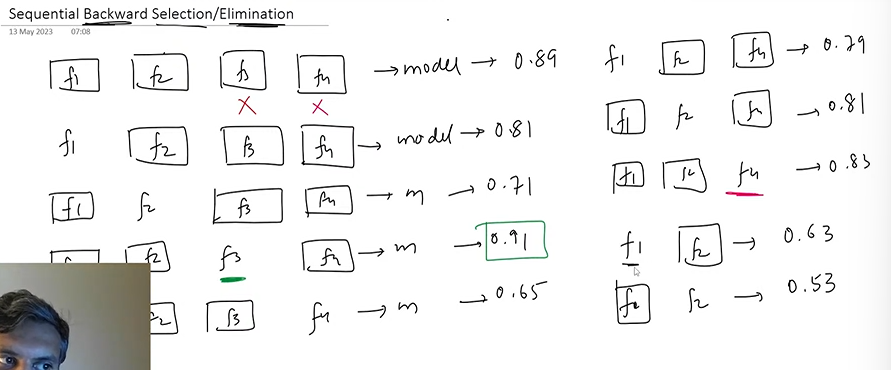

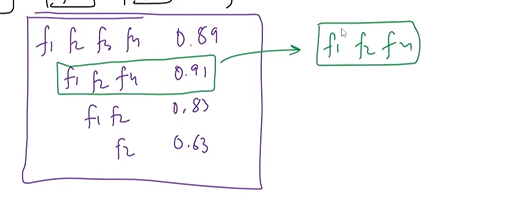
after each iteration there is a best result in each iteration from that best we have to select another best out of these best.

In [1]:
# code example
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#load data
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# separeate the target variable
X = data.drop('medv',axis=1)
y = data['medv']

#split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

